In [64]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from textblob import TextBlob

In [65]:

df = pd.read_csv('samsung1.csv', names=['id', 'Comment', 'Likes', 'Time', 'UserLink', 'user'])
df.shape

(221, 6)

In [66]:
df.head(10)

,id,Comment,Likes,Time,UserLink,user
0,NaN,Comment,Likes,Time,user,NaN
1,0.0,I think the way Apple optimizes its branded de...,256,2 months ago,NaN,NaN
2,1.0,S22 ULTRA ME SURPREENDEU MUITO,141,2 months ago,NaN,NaN
3,2.0,Isso que eu chamo de uma batalha de respeito,154,2 months ago,NaN,NaN
4,3.0,And consider that the iPhone 14 Pro Max's comp...,948,2 months ago,NaN,NaN
5,4.0,Both phones are amazingly fast. To me it doesn...,68,1 month ago,NaN,NaN
6,5.0,Imagina como será o S23 ultra... um monstro,50,2 months ago,NaN,NaN
7,6.0,"Que potência esses aparelhos, os app ficaram t...",69,2 months ago (edited),NaN,NaN
8,7.0,S22 ultra tem todo meu respeito,166,2 months ago,NaN,NaN
9,8.0,Al fin alguien que hace la comparativa con el ...,72,2 months ago,NaN,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        220 non-null    float64
 1   Comment   221 non-null    object 
 2   Likes     221 non-null    object 
 3   Time      221 non-null    object 
 4   UserLink  1 non-null      object 
 5   user      0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 10.5+ KB


In [68]:
df.isnull().sum()

id            1
Comment       0
Likes         0
Time          0
UserLink    220
user        221
dtype: int64

In [69]:
df = pd.read_csv('samsung1.csv')
df.duplicated().sum()

0

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,220.0,109.500000,63.652704,0.0,54.75,109.5,164.25,219.0
Likes,220.0,12.631818,68.720305,0.0,0.00,1.0,6.00,948.0
user,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df

,Unnamed: 0,Comment,Likes,Time,user
0,0,I think the way Apple optimizes its branded de...,256,2 months ago,NaN
1,1,S22 ULTRA ME SURPREENDEU MUITO,141,2 months ago,NaN
2,2,Isso que eu chamo de uma batalha de respeito,154,2 months ago,NaN
3,3,And consider that the iPhone 14 Pro Max's comp...,948,2 months ago,NaN
4,4,Both phones are amazingly fast. To me it doesn...,68,1 month ago,NaN
...,...,...,...,...,...
215,215,God iphone,3,2 months ago,NaN
216,216,galaxy s22 ultra king 10/10,0,3 weeks ago,NaN
217,217,Every gamer know that which phone is best,0,2 weeks ago,NaN
218,218,The apple is superior as usual,10,2 months ago,NaN


In [72]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# make space between words
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'([a-z])([A-Z])', r'\1 \2', x))
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'([A-Z])([A-Z][a-z])', r'\1 \2', x))

# Data Cleaning
def clean_text(text):
    # split text into words
    tokens = text.split()
    # remove punctuation from each word
    table = str.maketrans('', '', ' ')
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    # remove stop words
    stop_words = set(stopwords.words('english'))
    # remove month names
    stop_words.update(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
    tokens = [w for w in tokens if not w in stop_words]
    # join all
    return ' '.join(tokens)
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Comment,Likes,Time,user,Cleaned_Comment
0,0,I think the way Apple optimizes its branded de...,256,2 months ago,NaN,think way apple optimizes branded devices
1,1,S22 ULTRA ME SURPREENDEU MUITO,141,2 months ago,NaN,ultra surpreendeu muito
2,2,Isso que eu chamo de uma batalha de respeito,154,2 months ago,NaN,isso que eu chamo de uma batalha de respeito
3,3,And consider that the i Phone 14 Pro Max's com...,948,2 months ago,NaN,consider phone pro competitor ultra upcoming
4,4,Both phones are amazingly fast. To me it doesn...,68,1 month ago,NaN,phones amazingly matter fast real world situat...
5,5,Imagina como será o S23 ultra... um monstro,50,2 months ago,NaN,imagina como será um monstro
6,6,"Que potência esses aparelhos, os app ficaram t...",69,2 months ago (edited),NaN,que potência esses os app ficaram tudo nenhum
7,7,S22 ultra tem todo meu respeito,166,2 months ago,NaN,ultra tem todo meu respeito
8,8,Al fin alguien que hace la comparativa con el ...,72,2 months ago,NaN,al fin alguien que hace la comparativa con el ...
9,9,Glad to see that Samsung is finally keeping up...,47,2 months ago,NaN,glad see samsung finally keeping samsung ram m...


In [73]:
df.to_csv('samsung1_cleaned.csv', index=False)

C:\Users\Farhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [74]:
df = pd.read_csv('samsung1_cleaned.csv')
df.head(10)

,Unnamed: 0,Comment,Likes,Time,user,Cleaned_Comment
0,0,I think the way Apple optimizes its branded de...,256,2 months ago,NaN,think way apple optimizes branded devices
1,1,S22 ULTRA ME SURPREENDEU MUITO,141,2 months ago,NaN,ultra surpreendeu muito
2,2,Isso que eu chamo de uma batalha de respeito,154,2 months ago,NaN,isso que eu chamo de uma batalha de respeito
3,3,And consider that the i Phone 14 Pro Max's com...,948,2 months ago,NaN,consider phone pro competitor ultra upcoming
4,4,Both phones are amazingly fast. To me it doesn...,68,1 month ago,NaN,phones amazingly matter fast real world situat...
5,5,Imagina como será o S23 ultra... um monstro,50,2 months ago,NaN,imagina como será um monstro
6,6,"Que potência esses aparelhos, os app ficaram t...",69,2 months ago (edited),NaN,que potência esses os app ficaram tudo nenhum
7,7,S22 ultra tem todo meu respeito,166,2 months ago,NaN,ultra tem todo meu respeito
8,8,Al fin alguien que hace la comparativa con el ...,72,2 months ago,NaN,al fin alguien que hace la comparativa con el ...
9,9,Glad to see that Samsung is finally keeping up...,47,2 months ago,NaN,glad see samsung finally keeping samsung ram m...


In [75]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df['Cleaned_Comment'] = df['Cleaned_Comment'].astype(str)
df['Sentiment'] = df['Cleaned_Comment'].apply(get_sentiment)
df.head(10)

,Unnamed: 0,Comment,Likes,Time,user,Cleaned_Comment,Sentiment
0,0,I think the way Apple optimizes its branded de...,256,2 months ago,NaN,think way apple optimizes branded devices,0.000000
1,1,S22 ULTRA ME SURPREENDEU MUITO,141,2 months ago,NaN,ultra surpreendeu muito,0.000000
2,2,Isso que eu chamo de uma batalha de respeito,154,2 months ago,NaN,isso que eu chamo de uma batalha de respeito,0.000000
3,3,And consider that the i Phone 14 Pro Max's com...,948,2 months ago,NaN,consider phone pro competitor ultra upcoming,0.000000
4,4,Both phones are amazingly fast. To me it doesn...,68,1 month ago,NaN,phones amazingly matter fast real world situat...,0.557143
5,5,Imagina como será o S23 ultra... um monstro,50,2 months ago,NaN,imagina como será um monstro,0.000000
6,6,"Que potência esses aparelhos, os app ficaram t...",69,2 months ago (edited),NaN,que potência esses os app ficaram tudo nenhum,0.000000
7,7,S22 ultra tem todo meu respeito,166,2 months ago,NaN,ultra tem todo meu respeito,0.000000
8,8,Al fin alguien que hace la comparativa con el ...,72,2 months ago,NaN,al fin alguien que hace la comparativa con el ...,0.000000
9,9,Glad to see that Samsung is finally keeping up...,47,2 months ago,NaN,glad see samsung finally keeping samsung ram m...,0.212121


In [76]:
def get_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Label'] = df['Sentiment'].apply(get_label)
print("Neutral: ", 
      sum(df.Label == 'Neutral'))
print("Positive: ", 
      sum(df.Label == 'Positive'))
print("Negative: ", 
      sum(df.Label == 'Negative'))      

df

Neutral:  149
Positive:  64
Negative:  7


,Unnamed: 0,Comment,Likes,Time,user,Cleaned_Comment,Sentiment,Label
0,0,I think the way Apple optimizes its branded de...,256,2 months ago,NaN,think way apple optimizes branded devices,0.000000,Neutral
1,1,S22 ULTRA ME SURPREENDEU MUITO,141,2 months ago,NaN,ultra surpreendeu muito,0.000000,Neutral
2,2,Isso que eu chamo de uma batalha de respeito,154,2 months ago,NaN,isso que eu chamo de uma batalha de respeito,0.000000,Neutral
3,3,And consider that the i Phone 14 Pro Max's com...,948,2 months ago,NaN,consider phone pro competitor ultra upcoming,0.000000,Neutral
4,4,Both phones are amazingly fast. To me it doesn...,68,1 month ago,NaN,phones amazingly matter fast real world situat...,0.557143,Positive
...,...,...,...,...,...,...,...,...
215,215,God iphone,3,2 months ago,NaN,god iphone,0.000000,Neutral
216,216,galaxy s22 ultra king 10/10,0,3 weeks ago,NaN,galaxy ultra king,0.000000,Neutral
217,217,Every gamer know that which phone is best,0,2 weeks ago,NaN,every gamer know phone best,1.000000,Positive
218,218,The apple is superior as usual,10,2 months ago,NaN,apple superior usual,0.225000,Positive


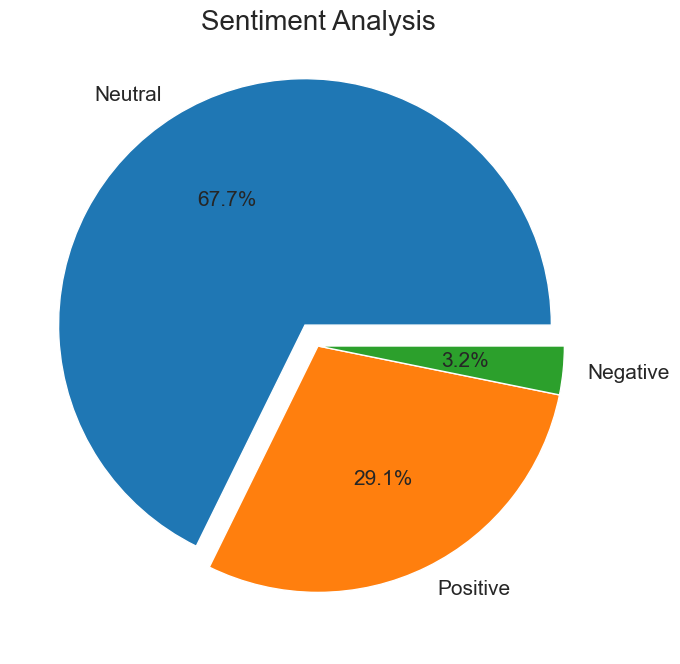

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Pie Chart
df['Label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), fontsize=15, explode=(0.1, 0, 0))
plt.title('Sentiment Analysis', fontsize=20)
plt.ylabel('')
plt.show()

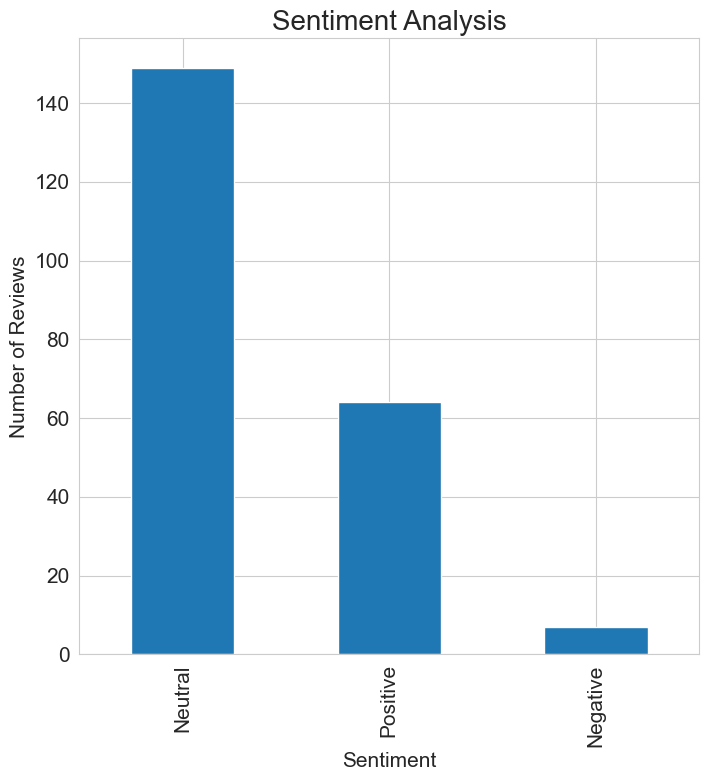

In [78]:
df['Label'].value_counts().plot.bar(figsize=(8, 8), fontsize=15)
plt.title('Sentiment Analysis', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlabel('Sentiment', fontsize=15)
plt.show()

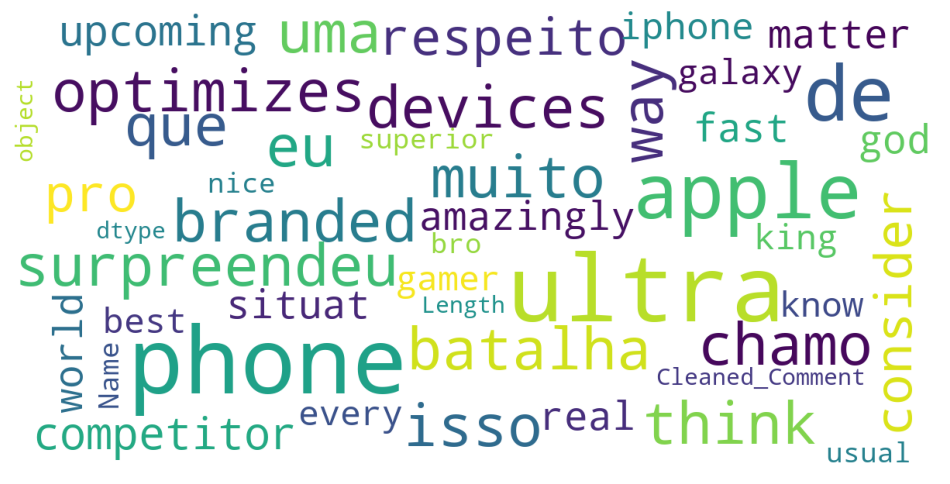

In [80]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# WordCloud For all Sentiment
show_wordcloud(df['Cleaned_Comment'])